# Batch Normalization
* 논문 제목 : Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
* 논문 발표 시점 : 2015년
* 논문 링크 : [](https://arxiv.org/pdf/1502.03167)
* 논문에서 설명한 알고리즘
  - mini-batch mean: $\mu_{\Beta} \leftarrow \frac{1}{m}\sum\limits_{i=1}^{m}X_{i} $
  - mini-batch variance: $\sigma_{\Beta}^{2} \leftarrow \frac{1}{m}\sum\limits_{i=1}^{m}(X_{i}-\mu\Beta)^{2} $
  - normalize: $\hat{X}_{i} \leftarrow \frac{X_{i}-\mu\Beta}{\sqrt{\sigma_{\Beta}^{2}+\epsilon}} $
  - scale and shift: $ y_{i} \leftarrow \gamma\hat{X_{i}} + \Beta \equiv BN_{\gamma,\Beta}(X_{i}) $

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [7]:
# 데이터셋 분할

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# 학습 진행

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4688 - loss: 1.6049 - val_accuracy: 0.7413 - val_loss: 0.7359
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7643 - loss: 0.6801 - val_accuracy: 0.8018 - val_loss: 0.5900
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8114 - loss: 0.5648 - val_accuracy: 0.8221 - val_loss: 0.5293
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8277 - loss: 0.5123 - val_accuracy: 0.8302 - val_loss: 0.5006
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8361 - loss: 0.4865 - val_accuracy: 0.8383 - val_loss: 0.4792
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8432 - loss: 0.4658 - val_accuracy: 0.8357 - val_loss: 0.4714
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8494 - loss: 0.4452 - val_accuracy: 0.8449 - val_loss: 0.4533
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8537 - loss: 0.4360 - val_accuracy: 0.8503 - val_loss

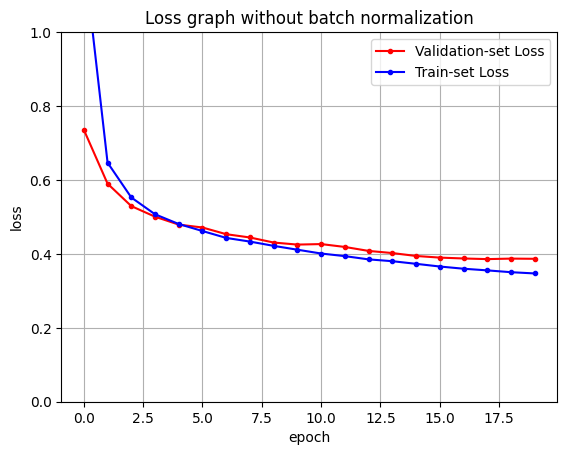

In [10]:
# loss 시각화

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

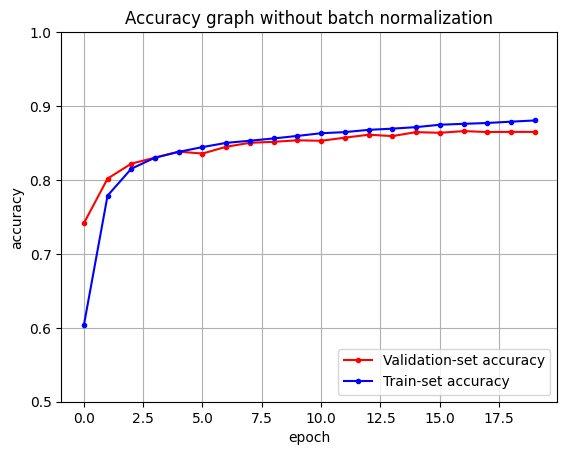

In [11]:
# accuracy 시각화

y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### BatchNormalization layer 적용

In [14]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5805 - loss: 1.2339 - val_accuracy: 0.6807 - val_loss: 1.0022
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8231 - loss: 0.5241 - val_accuracy: 0.7309 - val_loss: 0.8631
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8483 - loss: 0.4401 - val_accuracy: 0.7687 - val_loss: 0.7654
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8582 - loss: 0.4055 - val_accuracy: 0.8091 - val_loss: 0.6847
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8705 - loss: 0.3741 - val_accuracy: 0.8301 - val_loss: 0.6284
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8764 - loss: 0.3557 - val_accuracy: 0.8393 - val_loss: 0.5908
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8793 - loss: 0.3440 - val_accuracy: 0.8390 - val_loss: 0.5488
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8850 - loss: 0.3312 - val_accuracy: 0.8388 - val_los

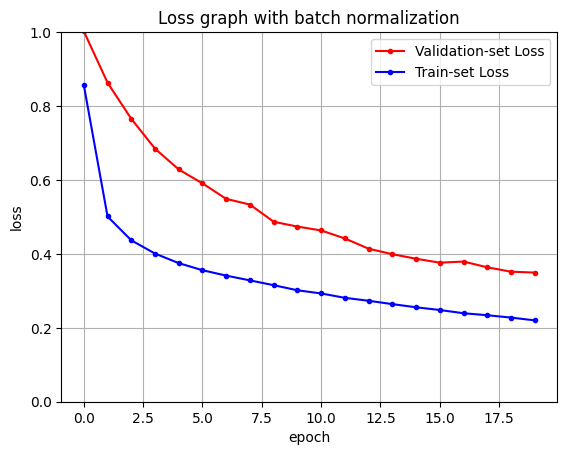

In [15]:
# loss 시각화

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

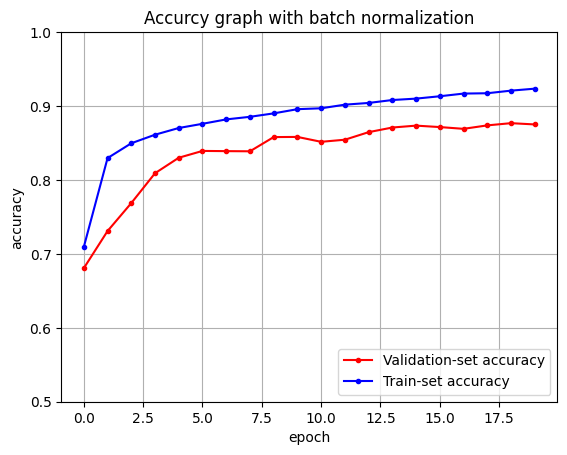

In [16]:
# accuracy 시각화

y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()